In [18]:
# ctrl + / = 주석처리
import pandas as pd
import numpy as np
# 시각화
import seaborn as sns 
import matplotlib.pyplot as plt
#폰트 설정
plt.rc('font',family='Malgun Gothic') 
plt.rc('axes',unicode_minus=False)
# 폰트 선명히
from IPython.display import set_matplotlib_formats

df = pd.read_csv("C:/Users/justi/Desktop/소상공인시장진흥공단_상가(상권)정보_의료기관_20190930/소상공인시장진흥공단_상가업소정보_의료기관_201909.csv", encoding='cp949')
# 파일 형태 보기 (행,열)
df.shape
df.head()
df.tail()
df.info()
df.columns
df.dtypes



<class 'pandas.core.frame.DataFrame'>
RangeIndex: 91335 entries, 0 to 91334
Data columns (total 39 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   상가업소번호     91335 non-null  int64  
 1   상호명        91335 non-null  object 
 2   지점명        1346 non-null   object 
 3   상권업종대분류코드  91335 non-null  object 
 4   상권업종대분류명   91335 non-null  object 
 5   상권업종중분류코드  91335 non-null  object 
 6   상권업종중분류명   91335 non-null  object 
 7   상권업종소분류코드  91335 non-null  object 
 8   상권업종소분류명   91335 non-null  object 
 9   표준산업분류코드   86413 non-null  object 
 10  표준산업분류명    86413 non-null  object 
 11  시도코드       90956 non-null  float64
 12  시도명        90956 non-null  object 
 13  시군구코드      90956 non-null  float64
 14  시군구명       90956 non-null  object 
 15  행정동코드      91335 non-null  int64  
 16  행정동명       90956 non-null  object 
 17  법정동코드      91280 non-null  float64
 18  법정동명       91280 non-null  object 
 19  지번코드       91335 non-null  float64
 20  대지구분코드

상가업소번호         int64
상호명           object
지점명           object
상권업종대분류코드     object
상권업종대분류명      object
상권업종중분류코드     object
상권업종중분류명      object
상권업종소분류코드     object
상권업종소분류명      object
표준산업분류코드      object
표준산업분류명       object
시도코드         float64
시도명           object
시군구코드        float64
시군구명          object
행정동코드          int64
행정동명          object
법정동코드        float64
법정동명          object
지번코드         float64
대지구분코드         int64
대지구분명         object
지번본번지          int64
지번부번지        float64
지번주소          object
도로명코드        float64
도로명           object
건물본번지          int64
건물부번지        float64
건물관리번호       float64
건물명           object
도로명주소         object
구우편번호        float64
신우편번호        float64
동정보           object
층정보          float64
호정보          float64
경도           float64
위도           float64
dtype: object

<Axes: >

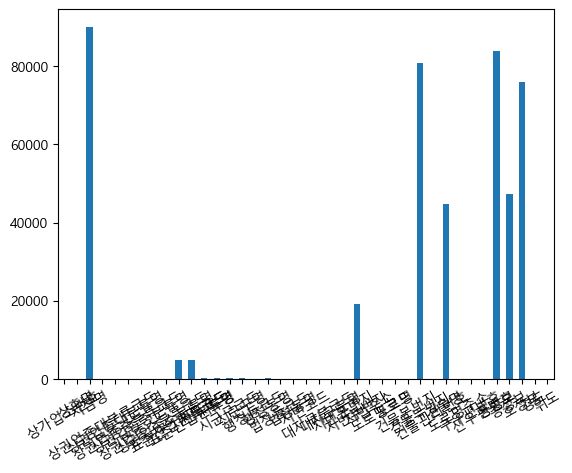

In [ ]:
###결측치
#결측치 개수 세기
null_count = df.isnull().sum()
null_count.plot.bar(rot=30)


<Axes: >

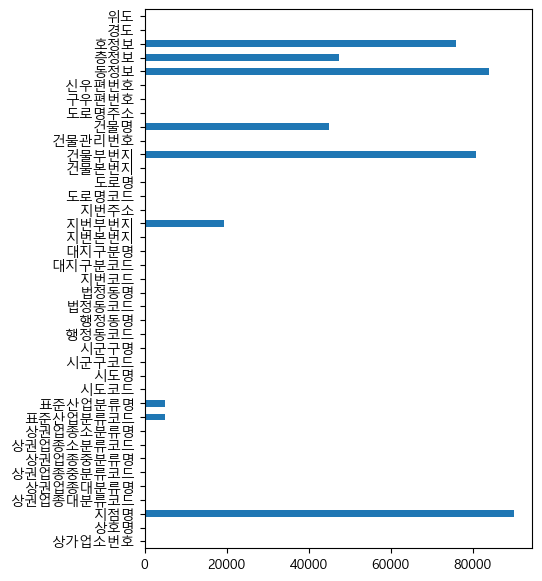

In [ ]:
#이름이 겹치는 문제를 수정
null_count.plot.barh(figsize=(5,7))

In [ ]:
#데이터프레임 형태
df_null_count = null_count.reset_index
df_null_count.head()
#칼럼명 지정
df_null_count.columns = ["컬럼명", "결측치수"]
df.null_count.head()
#결측치 기준 내림차순 정렬
df.null_count.sort_values(by="결측치수", ascending=False)
#상위 10개만 뽑아서 저장
df_null_count_top = df.null_count.sort_values(by="결측치수", ascending=False).head(10)

In [ ]:
df["지점명"].head()
drop_columns = df_null_count_top["컬럼명"].tolist()
df[drop_columns].head()
df = df.drop(drop_columns, axis=1)

In [ ]:
df["위도"].dtypes
df["위도"].mean()
df["위도"].describe()
df[["위도", "경도"]].describe()
df.describe(include="number")
df.describe(include="object")
df.describe(include="all")

In [19]:
df["상권업종소분류명"].unique()
df["상권업종소분류명"].nunique()
#df["상권업종소분류명"].nunique() 와 같은 값을 보여줌
len(df["상권업종소분류명"].unique())
df["시도명"].value_counts()
#차지하는 비율을 알려준다
city_normalize = df["시도명"].value_counts(normalize=True)

<Axes: ylabel='시도명'>

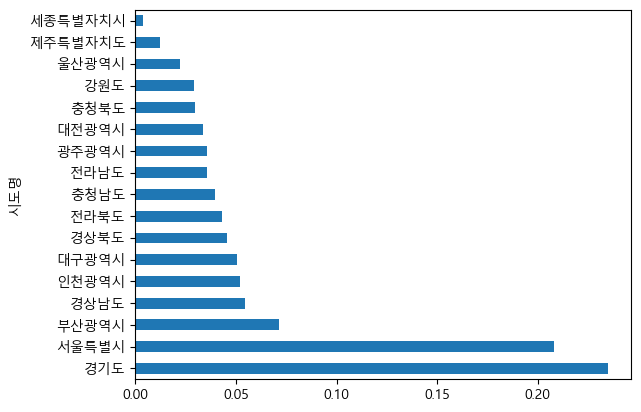

In [20]:
city_normalize.plot.barh()

<Axes: ylabel='proportion'>

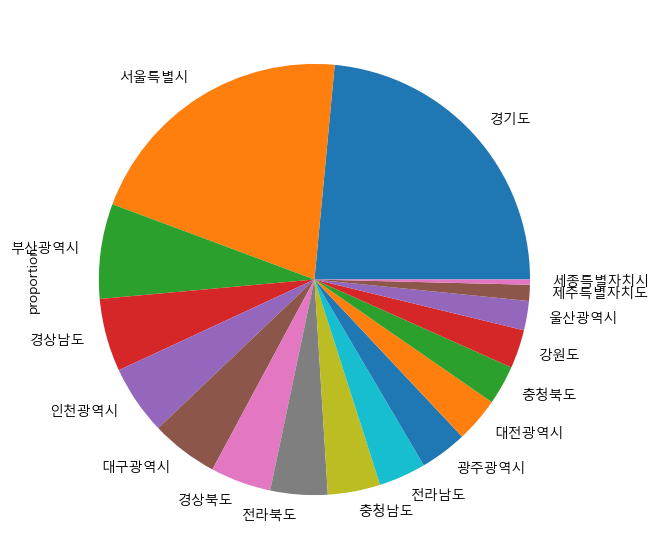

In [21]:
city_normalize.plot.pie(figsize=(7, 7))

<Axes: xlabel='count', ylabel='시도명'>

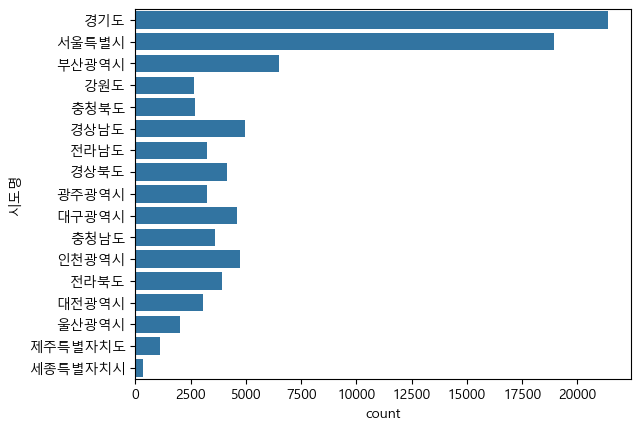

In [22]:
# seaborn은 대체로 x, y, data를 기본으로 넣어줘야 하지만 countplot은 x,y 중 하나만 넣어도 됩니다.
sns.countplot(data=df, y="시도명")

<Axes: xlabel='상권업종중분류명'>

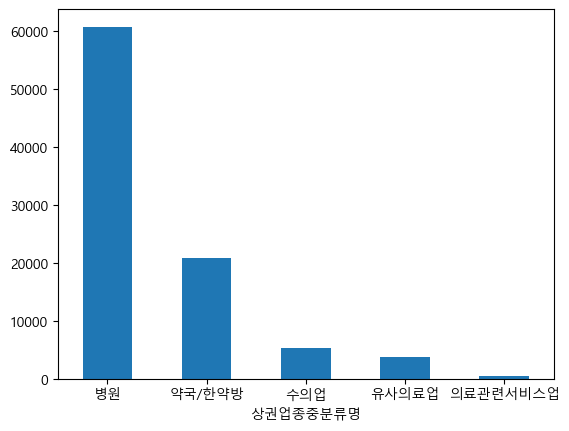

In [25]:
c = df["상권업종중분류명"].value_counts()
n = df["상권업종중분류명"].value_counts(normalize=True)
c.plot.bar(rot=0)

<Axes: ylabel='proportion'>

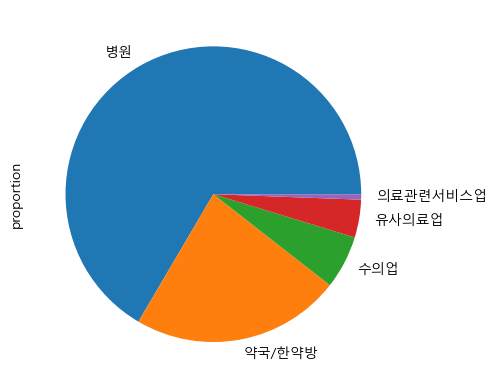

In [26]:
n.plot.pie()

<Axes: xlabel='상권업종소분류명'>

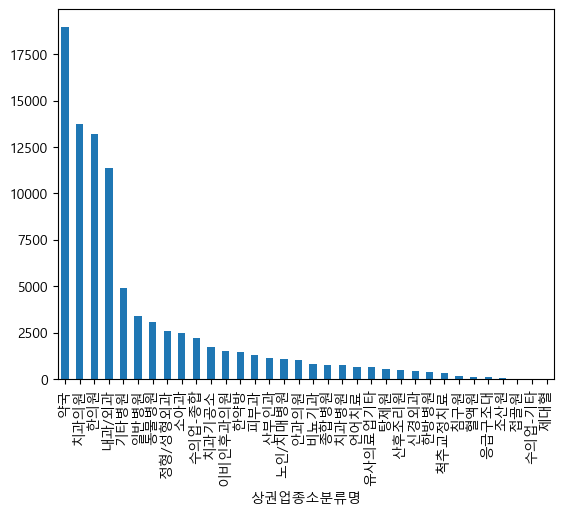

In [28]:
c = df["상권업종소분류명"].value_counts()
c.plot.bar()

<Axes: xlabel='상권업종소분류명'>

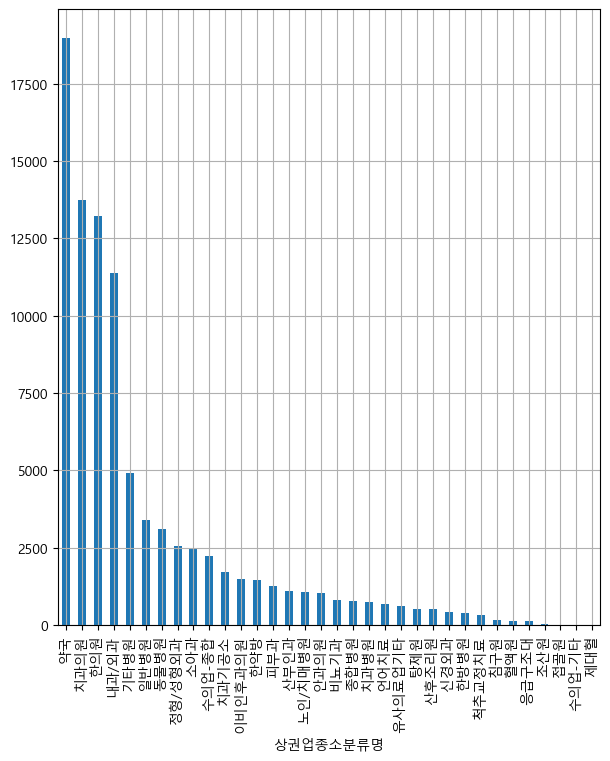

In [29]:
c.plot.bar(figsize=(7,8), grid=True)

In [ ]:
df["상권업종중분류명"] == "약국/한약방"
df[df["상권업종중분류명"] == "약국/한약방"]
# 다른 목적으로 사용한다면 copy()를 해야 warning이 뜨지 않거나 원본에 영향을 미치지 않습니다
df_medical = df[df["상권업종중분류명"] == "약국/한약방"].copy()

In [ ]:
# 상권업종대분류명이 의료인 데이터의 상권업종중분류명을 가져오고 싶을 때 loc를 함께 사용
df.loc[df["상권업종대분류명"] == "의료"]["상권업종중분류명"]
# 같은 방법이지만 속도가 더 빠름
df.loc[df["상권업종대분류명"] == "의료", "상권업종중분류명"]

In [ ]:
#개수 세기
m = df["상권업종대분류명"] == "의료"
df.loc[m, "상권업종중분류명"].value_counts()

In [ ]:
df[df["상권업종중분류명"] ==  "유사의료업"].shape #행 열 수 파악

In [ ]:
df_seoul_drug = (df["상권업종소분류명"] == "약국") & (df["시도명"] == "서울특별시")
c = df_seoul_drug["시군구명"].value_counts()
c.head()
c.plot.bar(rot=60)
# and는 &, or은 |를 사용

In [ ]:
n = df_seoul_drug["시군구명"].value_counts(normalize=True)
n.head()

In [ ]:
df_seoul_hospital = df[df["상권업종소분류명"] == "종합병원" & (df["시도명"] == "서울특별시")].copy()
df_seoul_hospital
df_seoul_hospital["시군구명"].value_counts()

In [ ]:
df_seoul_hospital["상호명"].str.contains("종합병원")
df_seoul_hospital.loc[~df_seoul_hospital["상호명"].str.contains("종합병원"), "상호명"].unique()
df_seoul_hospital["상호명"].str.contains("꽃배달")
df_seoul_hospital[df_seoul_hospital["상호명"].str.contains("꽃배달")]

In [ ]:
drop_row = df_seoul_hospital[
df_seoul_hospital["상호명"].str.contains("꽃배달|의료기|장례식장|상담소|어린이집")].index

drop_row = drop_row.tolist()
drop_row

In [ ]:
drop_row2 = df_seoul_hospital[df_seoul_hospital["상호명"].str.endswith("의원")].index
drop_row2.tolist()
drop_row2

drop_row = drop_row + drop_row2
len(drop_row)

In [ ]:
print(df_seoul_hospital.shape)
df_seoul_hospital = df_seoul_hospital.drop(drop_row, axis=0)
print(df_seoul_hospital.shape)

In [ ]:
df_seoul_hospital["시군구명"].value_counts().plot.bar()

In [ ]:
plt.figure(figsize=(15, 4))
sns.countplot(data=df_seoul_hospital, x="시군구명")

In [ ]:
df_seoul = df[df["시도명"] == "서울특별시"].copy()
df_seoul.shape
df_seoul ["시도명"].value_counts()
df_seoul ["시도명"].value_counts().plot.bar(figsize=(10, 4), rot=30)
plt.figure(figsize=(15, 4))
sns.countplot(data=df_seoul, x="시군구명")

In [ ]:
df_seoul[["경도", "위도", "시군구명"]].plot.scatter(x="경도", y="위도", figsize=(8, 7), grid=True)

In [ ]:
plt.figure(figsize=(9, 8))
sns.scatterplot(data=df_seoul, x="경도", y="위도", hue="상권업종중분류명")

In [ ]:
plt.figure(figsize=(9, 8))
sns.scatterplot(data=df_seoul, x="경도", y="위도", hue="시군구명")

In [ ]:
plt.figure(figsize=(16, 12))
sns.scatterplot(data=df_seoul, x="경도", y="위도", hue="시도명")

In [32]:
python -m pip install folium

SyntaxError: invalid syntax (1051987242.py, line 1)